### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

I do the fast fourier transform and then shift the image. \
Then, I applied low pass filter into this image. \
After I applied low pass filter, I shift the filtered image and inverse fast fourier transform back.

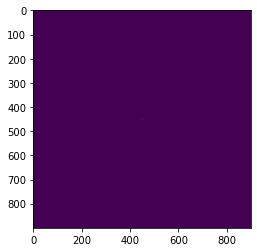

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as py
from scipy import misc, fft
%matplotlib inline

image = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')

grayim = image[:,:,0]
norm = np.sqrt(grayim.shape[0] * grayim.shape[1])

image_D1 = fft.fft2(grayim)/norm
image_D2 = fft.fftshift(image_D1)

abs_image = np.abs(image_D2)
plt.imshow(abs_image)

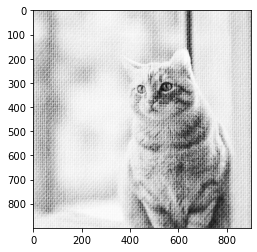

In [2]:
plt.imshow(grayim, cmap=plt.get_cmap('gray'))

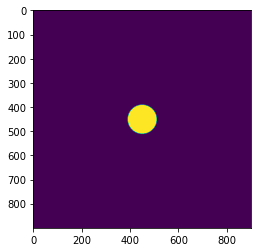

In [3]:
n = 901
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R = 60

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

M = X**2 + Y**2 < R**2

D1 = fft.fft2(M)/n
D2 = fft.fftshift(D1)

D3 = fft.fft2(D1)/n
#print np.abs(D3)[:,50]
plt.imshow(np.abs(D3))

In [4]:
filtered_img = image_D2 * M
img_shifted = fft.fftshift(filtered_img)
img_inv = fft.ifft2(img_shifted) 

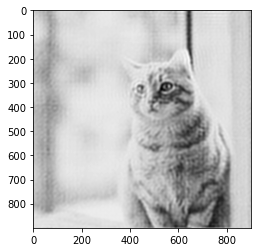

In [5]:
# low pass filter

image_inv = np.abs(img_inv)
image_inv -= image_inv.min()
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
plt.imshow(image_inv, cmap=plt.get_cmap('gray'))